In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/stroke/imbalaced_stroke_pca5a.csv')
data.head()

,stroke,Race,alcohol,high cholesterol,Coronary Heart Disease,Waist Circumference,Diastolic blood pressure,Total fat,Total saturated fatty acids,Total monounsaturated fatty acids
0,0,5,0,0,0,156.3,64,65.64,25.112,24.090
1,0,1,0,1,0,97.0,64,42.56,13.423,15.389
2,1,3,1,1,0,95.0,88,103.32,43.295,36.727
3,0,3,1,1,0,126.4,68,81.60,24.527,30.567
4,0,4,0,0,0,104.2,80,67.49,26.030,24.837


In [3]:

# Split features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Display the encoded dataset
print(X)
print(y)


      Race  alcohol   high cholesterol  Coronary Heart Disease  \
0        5         0                 0                       0   
1        1         0                 1                       0   
2        3         1                 1                       0   
3        3         1                 1                       0   
4        4         0                 0                       0   
...    ...       ...               ...                     ...   
4598     3         1                 1                       0   
4599     1         1                 1                       0   
4600     4         1                 0                       1   
4601     2         1                 0                       0   
4602     3         1                 0                       0   

      Waist Circumference  Diastolic blood pressure  Total fat  \
0                   156.3                        64      65.64   
1                    97.0                        64      42.56   
2        

In [4]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

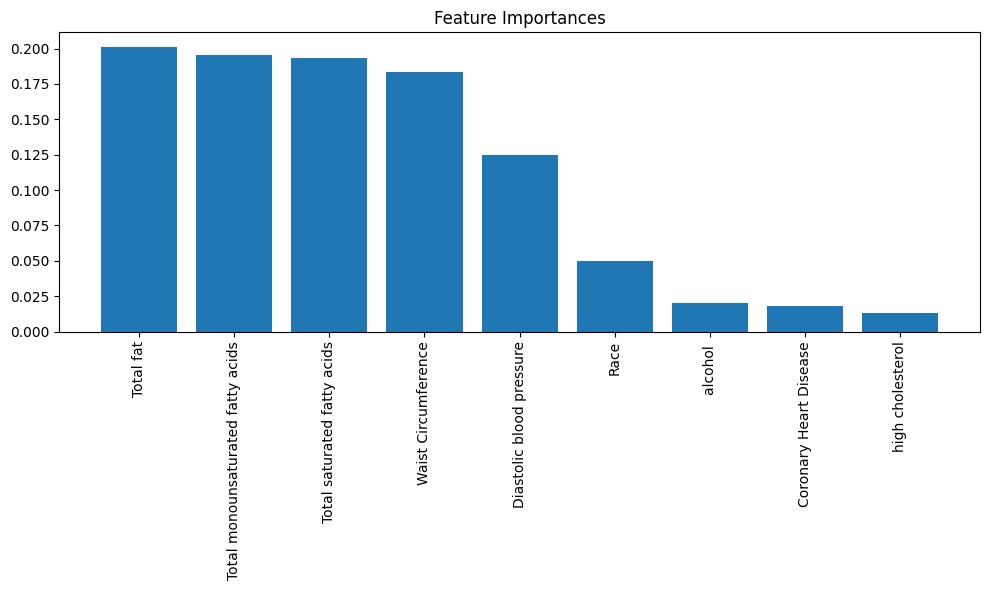

In [ ]:
# Calculate feature importance
importances = rf_classifier.feature_importances_
feature_names = X_train.columns  # Use the columns from X_train

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


Cross-Validation Scores: [0.92073833 0.91965255 0.92073833 0.92065217 0.91956522]
Mean Cross-Validation Score: 0.9202693197375253


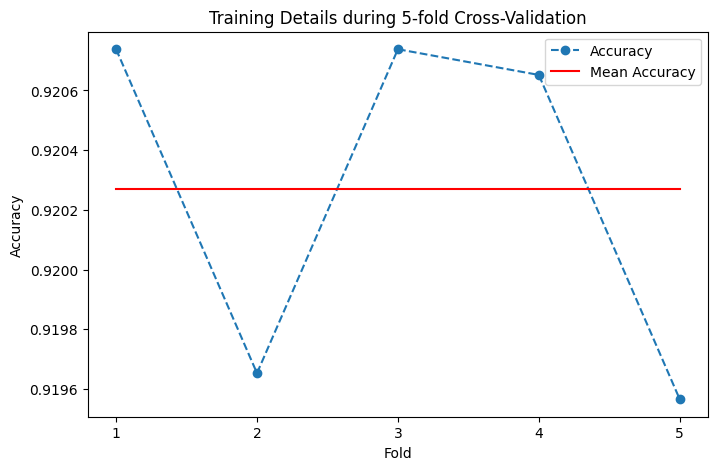

In [ ]:
# Model training with 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(rf_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()




Accuracy: 0.9185667752442996
Precision: 0.9252053533493839
Recall: 0.9185667752442996
F1-score: 0.8806379048787073
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       845
           1       1.00      0.01      0.03        76

    accuracy                           0.92       921
   macro avg       0.96      0.51      0.49       921
weighted avg       0.93      0.92      0.88       921



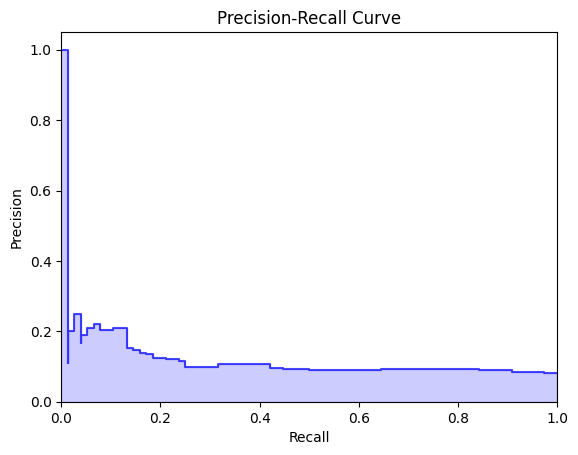

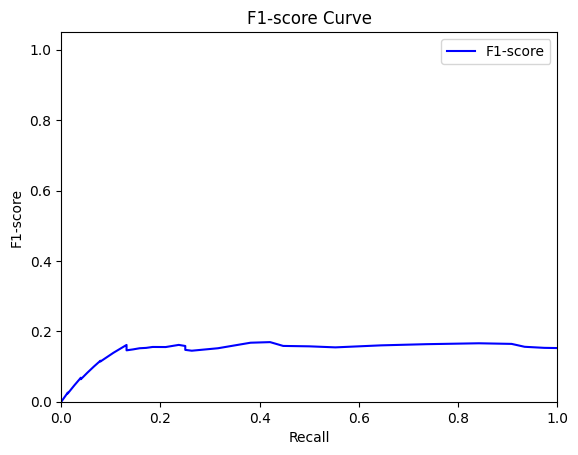

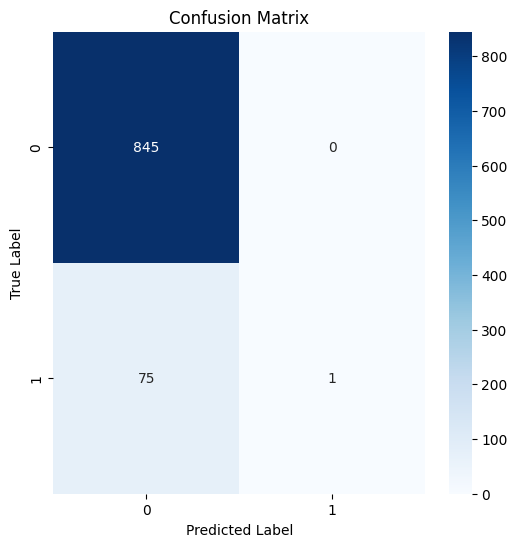

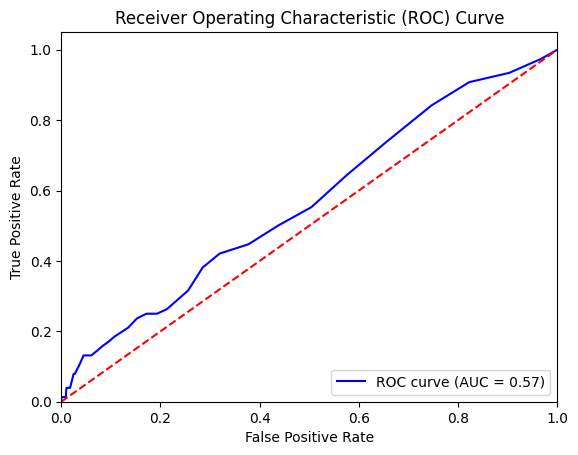

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, y_train, X_test, and y_test are already defined

# Initialize the classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier with the training data
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score with 'weighted' average
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC AUC Score: 0.5737065557425544


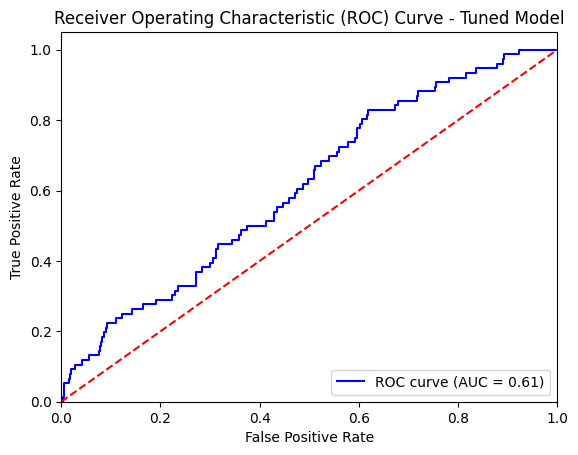

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Plot ROC curve for the best model
y_pred_probs_best = best_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_probs_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.plot(fpr_best, tpr_best, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Tuned Model')
plt.legend(loc="lower right")
plt.show()


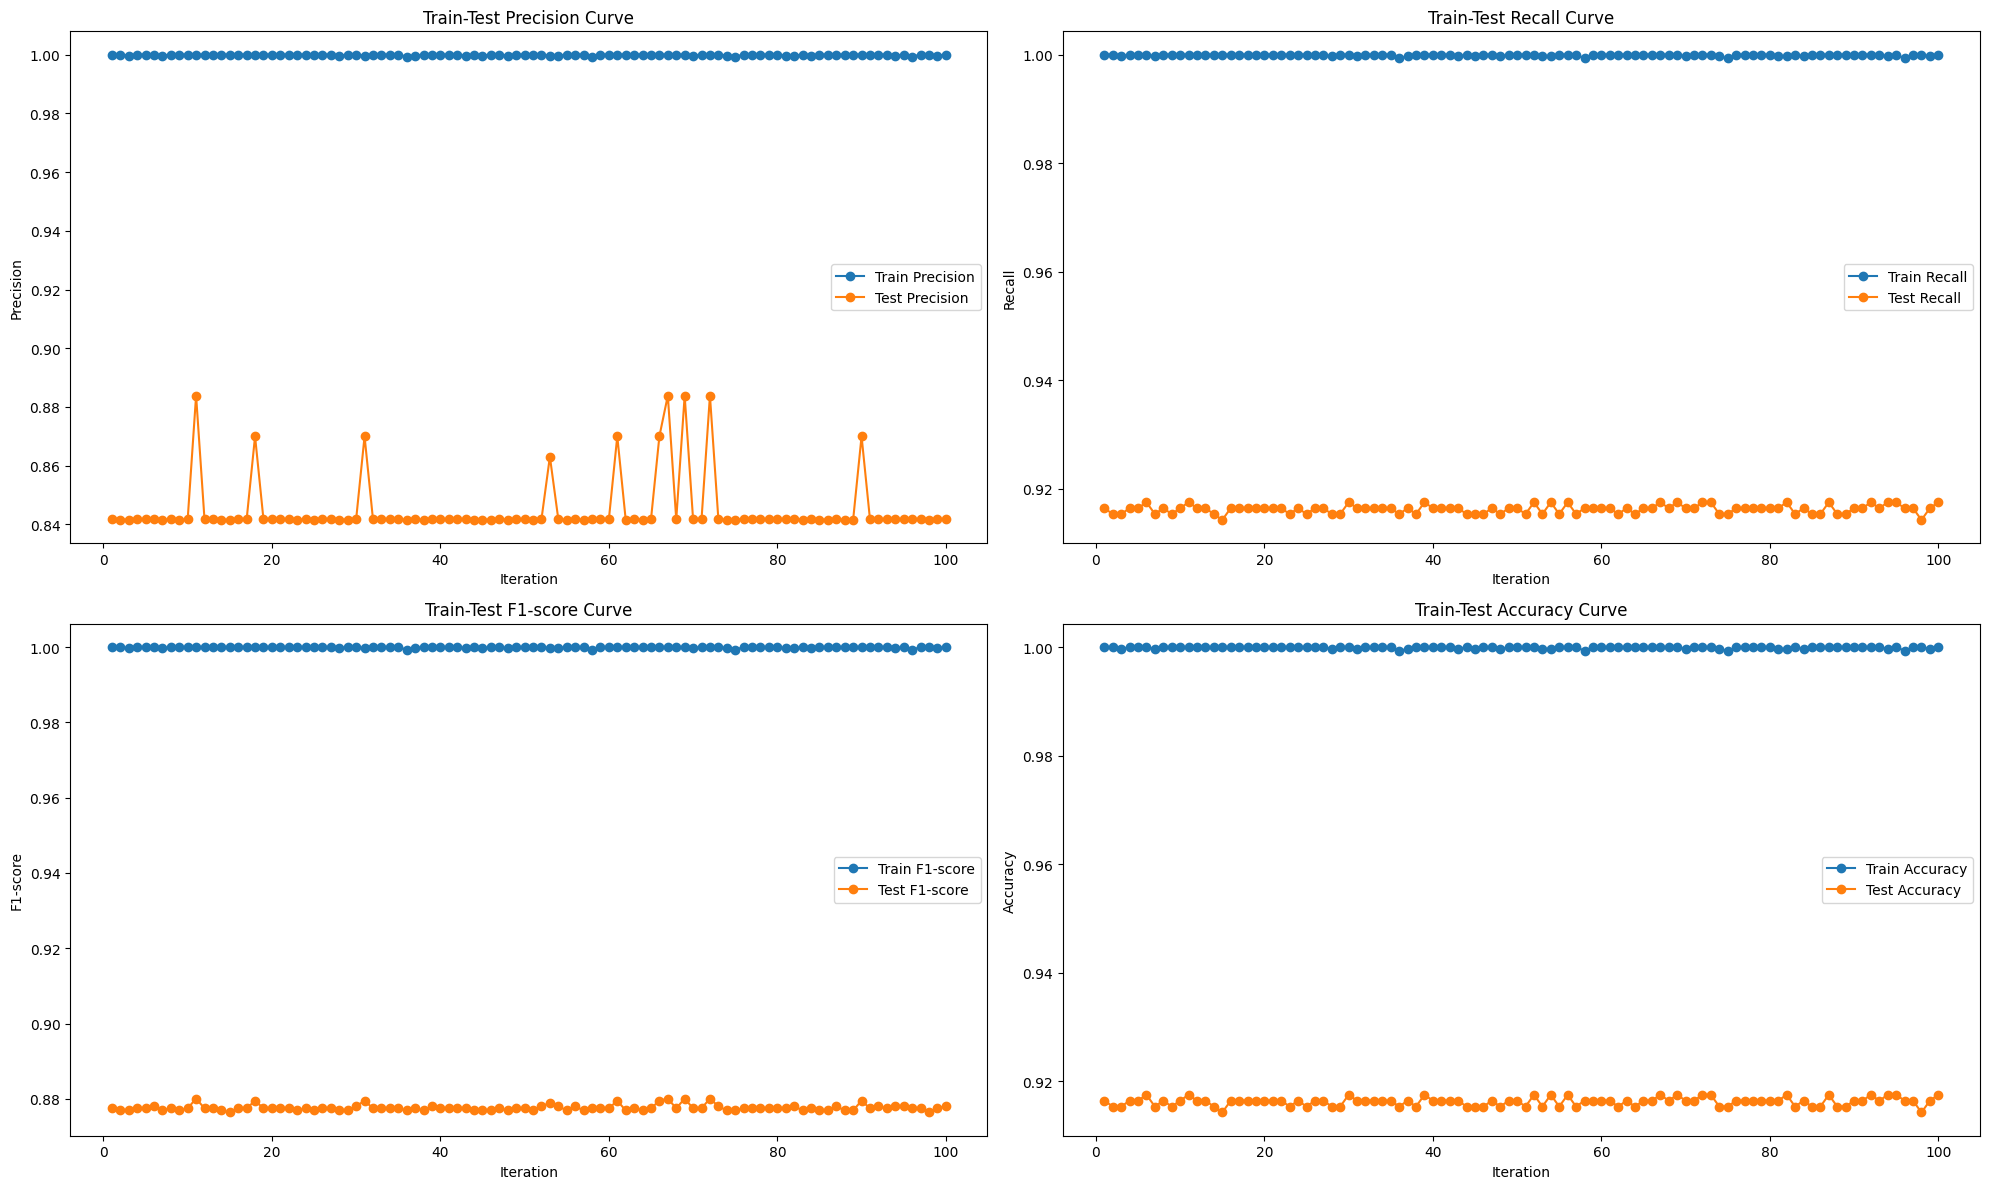

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable respectively


# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Step 3: Model training
    rf_classifier = RandomForestClassifier(random_state=i)  # Set a different random state for each iteration
    rf_classifier.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
    test_precision.append(precision_score(y_test, y_test_pred, average='weighted', zero_division=0))

    train_recall.append(recall_score(y_train, y_train_pred, average='weighted'))
    test_recall.append(recall_score(y_test, y_test_pred, average='weighted'))

    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 12))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [6]:
from sklearn.svm import SVC

# Initialize the SVC classifier
svc_classifier = SVC(kernel='rbf', random_state=42)  # You can adjust the kernel and other parameters as needed

# Train the model
svc_classifier.fit(X_train, y_train)


SVC(random_state=42)

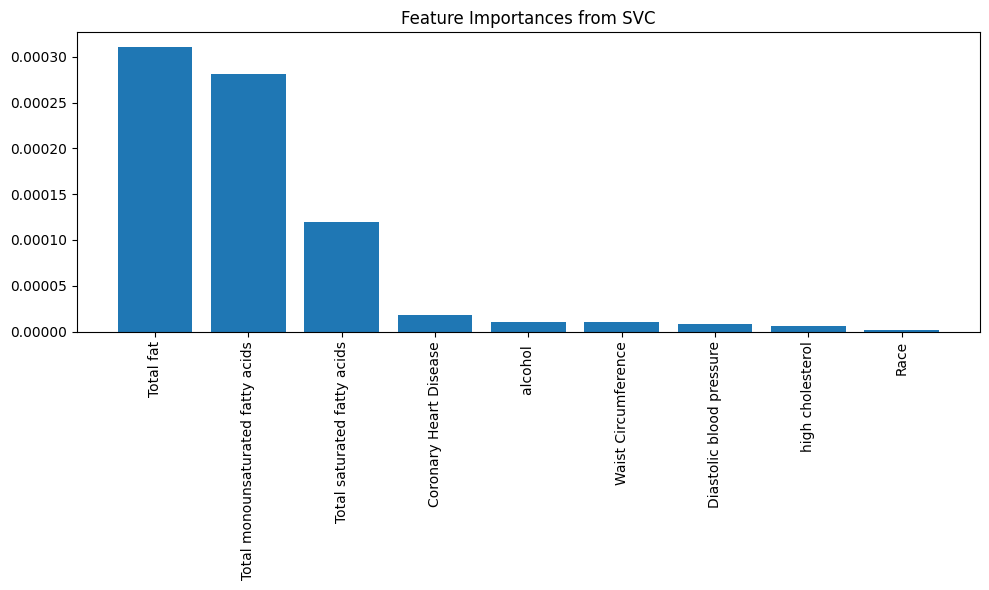

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Standardize the features (important for SVC)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a linear SVC model
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)

# Get feature importances (coefficients)
importances = np.abs(svc.coef_[0])
feature_names = X_train.columns  # Use the columns from X_train

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from SVC")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


Cross-Validation Scores: [0.9218241  0.92073833 0.92073833 0.92173913 0.92173913]
Mean Cross-Validation Score: 0.9213558041825992


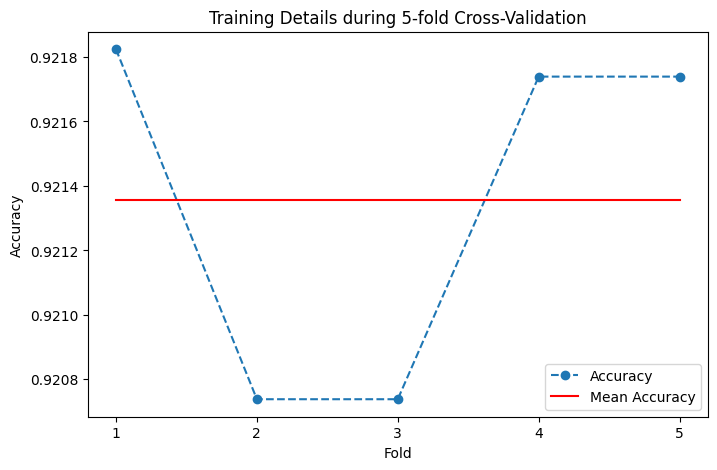

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable respectively

# Model training with 5-fold cross-validation
cv_scores = cross_val_score(svc_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(svc_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Accuracy: 0.9174809989142236
Precision: 0.8417713833686417
Recall: 0.9174809989142236
F1-score: 0.8779971054162162
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       845
           1       0.00      0.00      0.00        76

    accuracy                           0.92       921
   macro avg       0.46      0.50      0.48       921
weighted avg       0.84      0.92      0.88       921



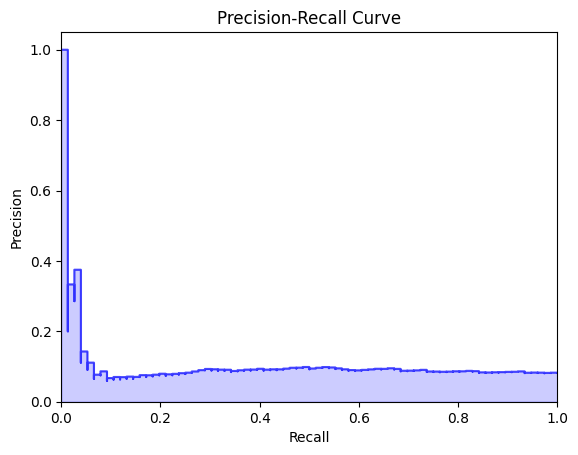

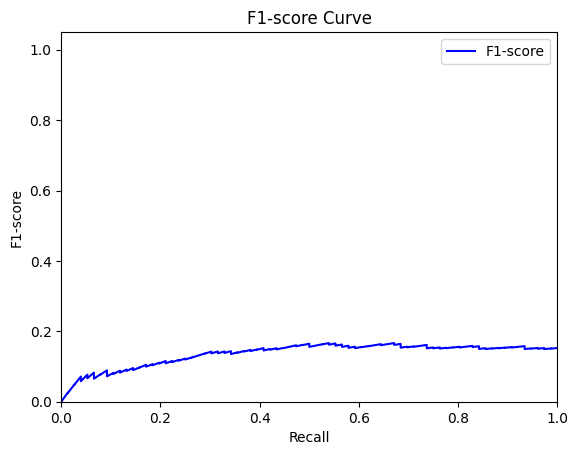

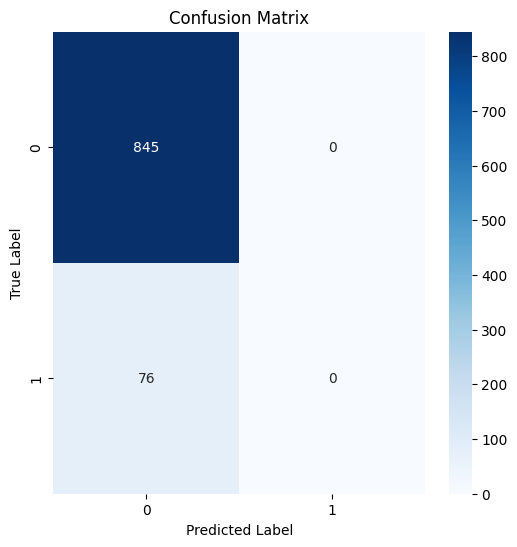

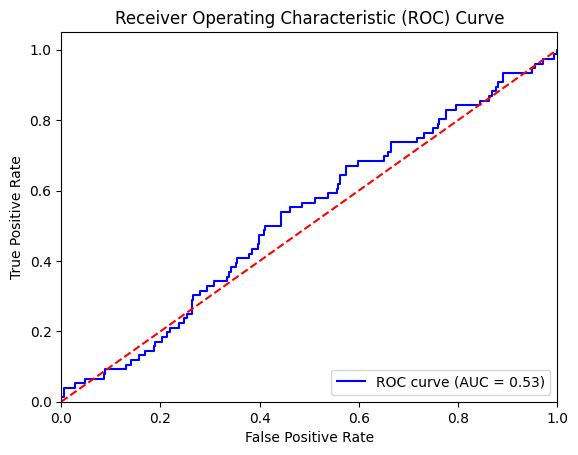

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, and y_test are already defined

# Standardize the features (SVC works better with standardized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the classifier
svc_classifier = SVC(probability=True)

# Fit the classifier with the training data
svc_classifier.fit(X_train, y_train)

# Predictions
y_pred = svc_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score with 'weighted' average
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = svc_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = svc_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


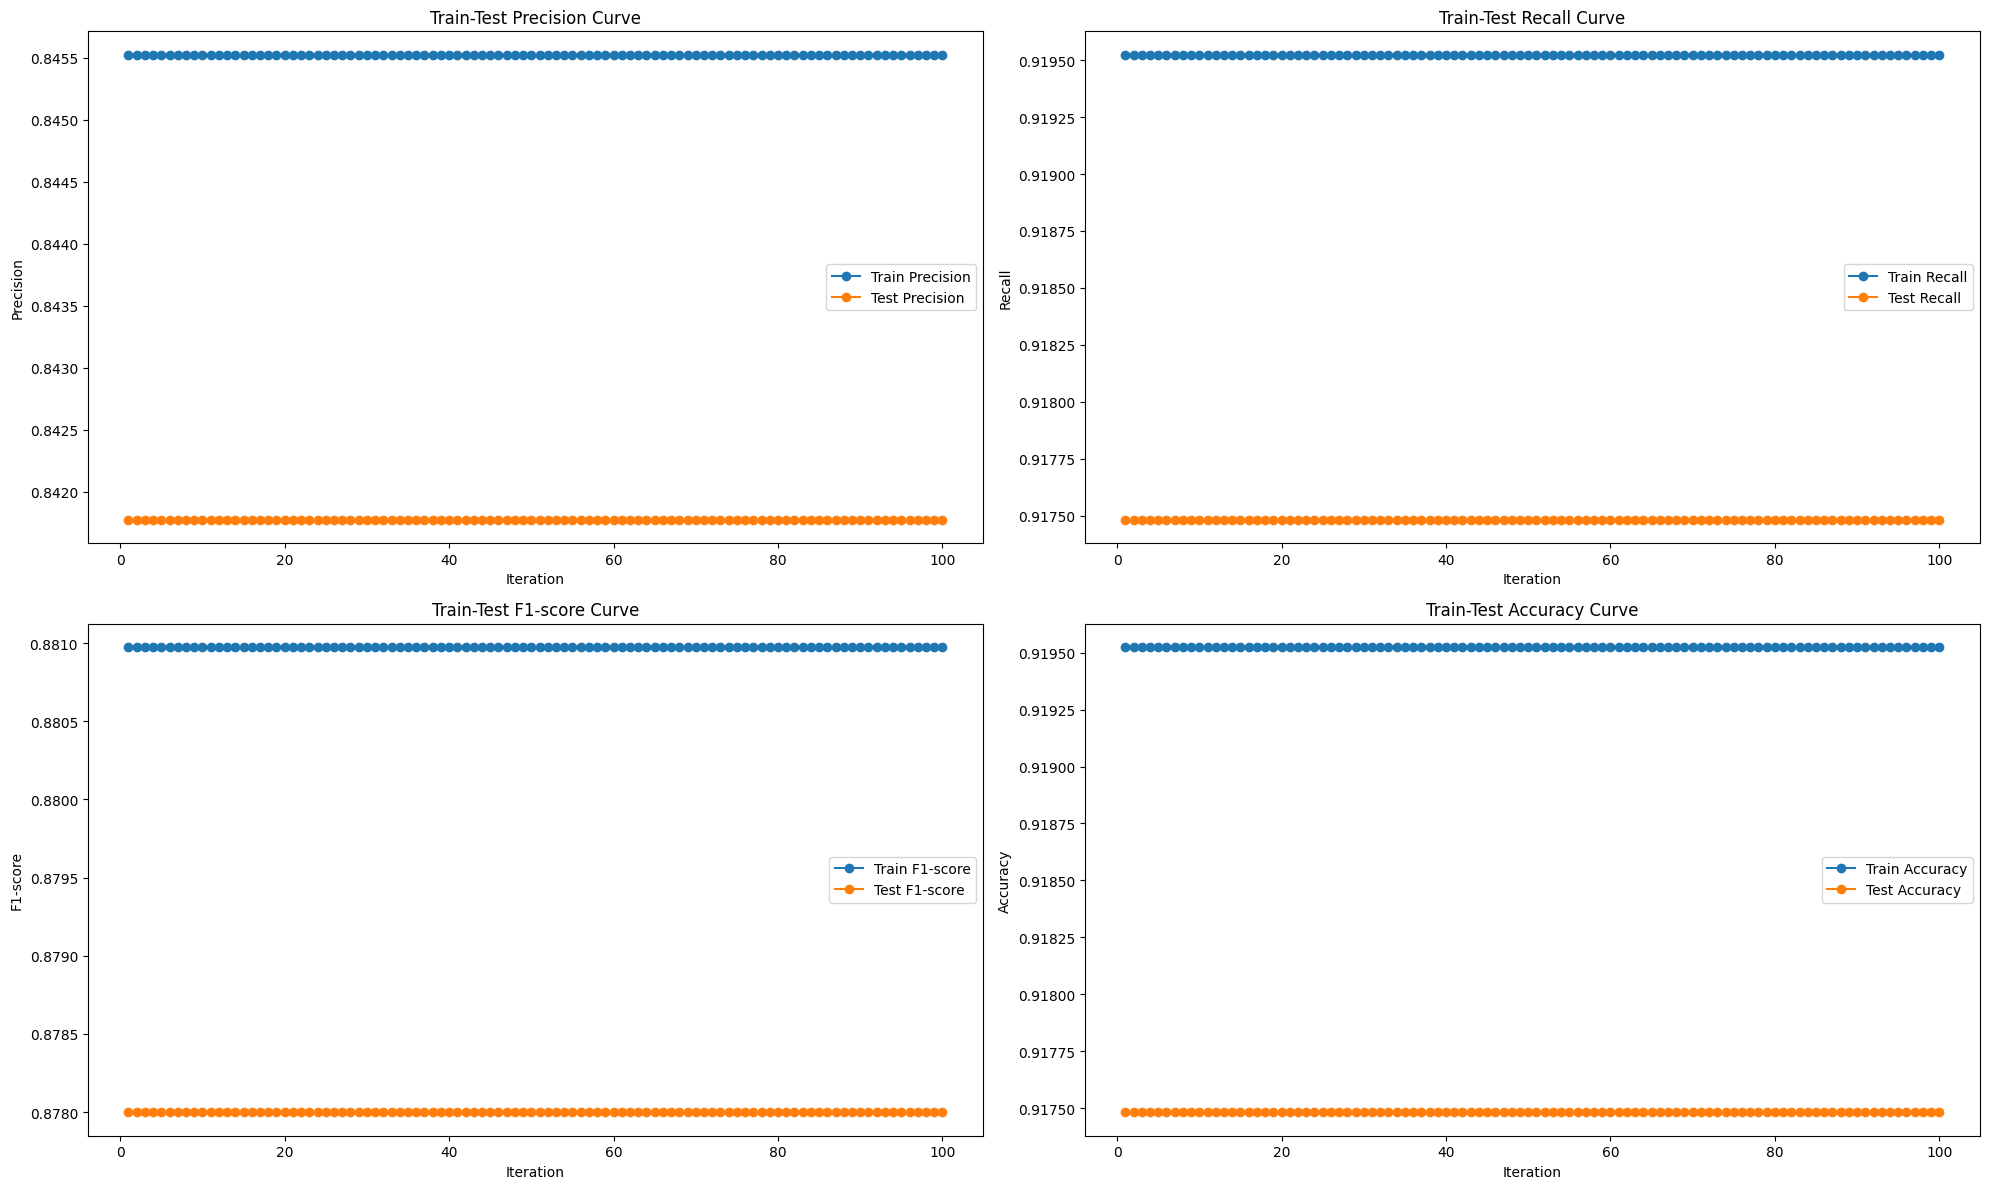

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable respectively

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Step 1: Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Step 2: Model training
    svc_classifier = SVC(kernel='rbf', random_state=i)  # Linear kernel used for simplicity
    svc_classifier.fit(X_train, y_train)

    # Step 3: Model evaluation on train and test sets
    y_train_pred = svc_classifier.predict(X_train)
    y_test_pred = svc_classifier.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
    test_precision.append(precision_score(y_test, y_test_pred, average='weighted', zero_division=0))

    train_recall.append(recall_score(y_train, y_train_pred, average='weighted'))
    test_recall.append(recall_score(y_test, y_test_pred, average='weighted'))

    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 12))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors and other parameters as needed

# Train the model
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

Cross-Validation Scores: [0.9218241  0.917481   0.91965255 0.9173913  0.91630435]
Mean Cross-Validation Score: 0.9185306613794081


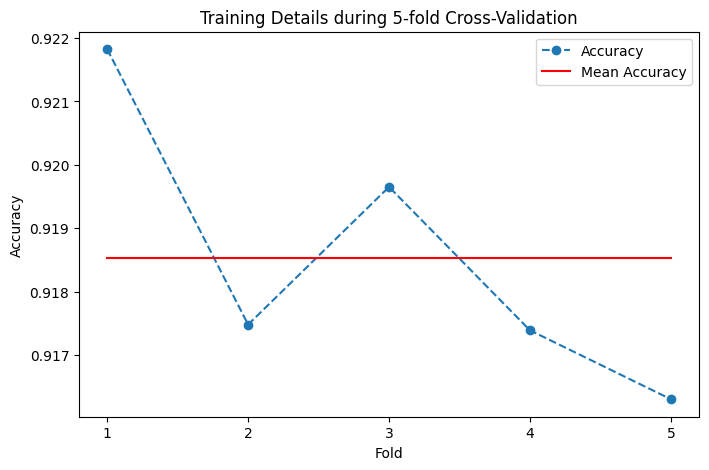

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Assuming X and y are your features and target variable respectively

# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust parameters as needed

# Model training with 5-fold cross-validation
cv_scores = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(knn_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()


Accuracy: 0.9120521172638436
Precision: 0.853983787686095
Recall: 0.9120521172638436
F1-score: 0.8772204256840849
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       845
           1       0.14      0.01      0.02        76

    accuracy                           0.91       921
   macro avg       0.53      0.50      0.49       921
weighted avg       0.85      0.91      0.88       921



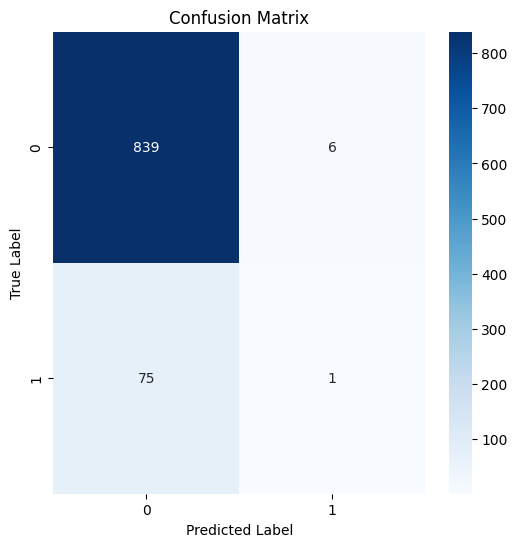

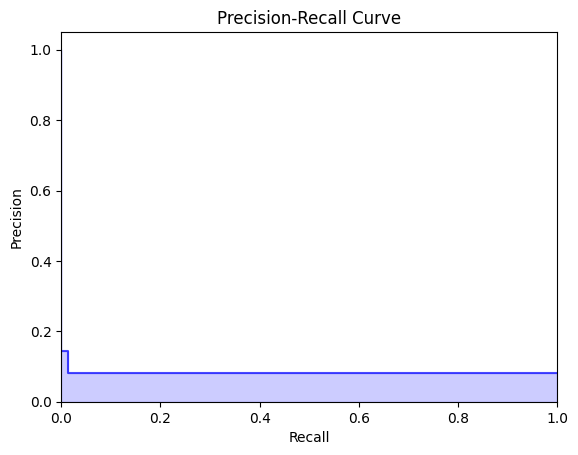

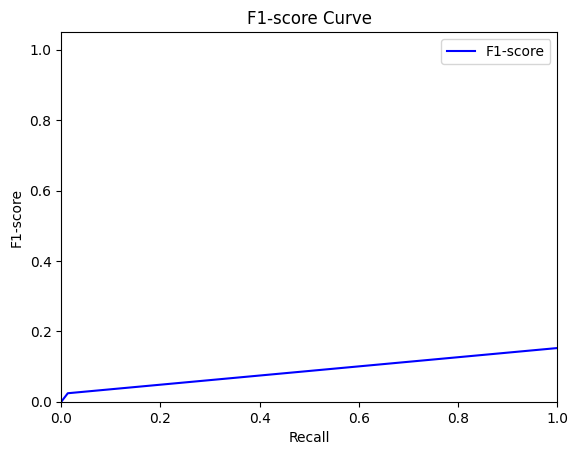

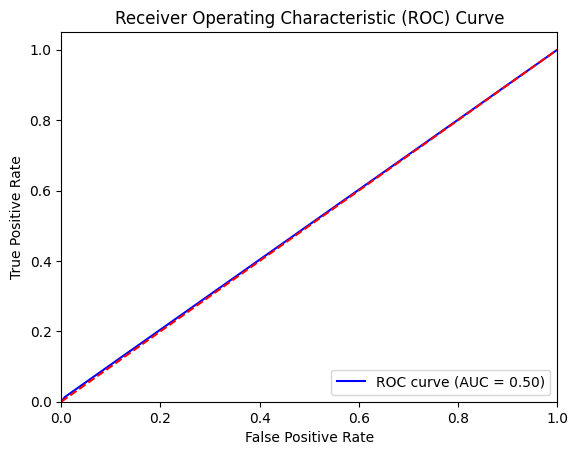

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, and y_test are already defined

# Standardize the features (kNN benefits from standardized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

# Fit the classifier with the training data
knn_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate accuracy, precision, recall, and F1-score with 'weighted' average
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision-recall curve (not directly available for kNN, so using accuracy as an example)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve (since kNN doesn't provide probabilities, using accuracy as an example)
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Calculate ROC curve and AUC (not directly available for kNN, so using accuracy as an example)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve (since kNN doesn't provide probabilities, using accuracy as an example)
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


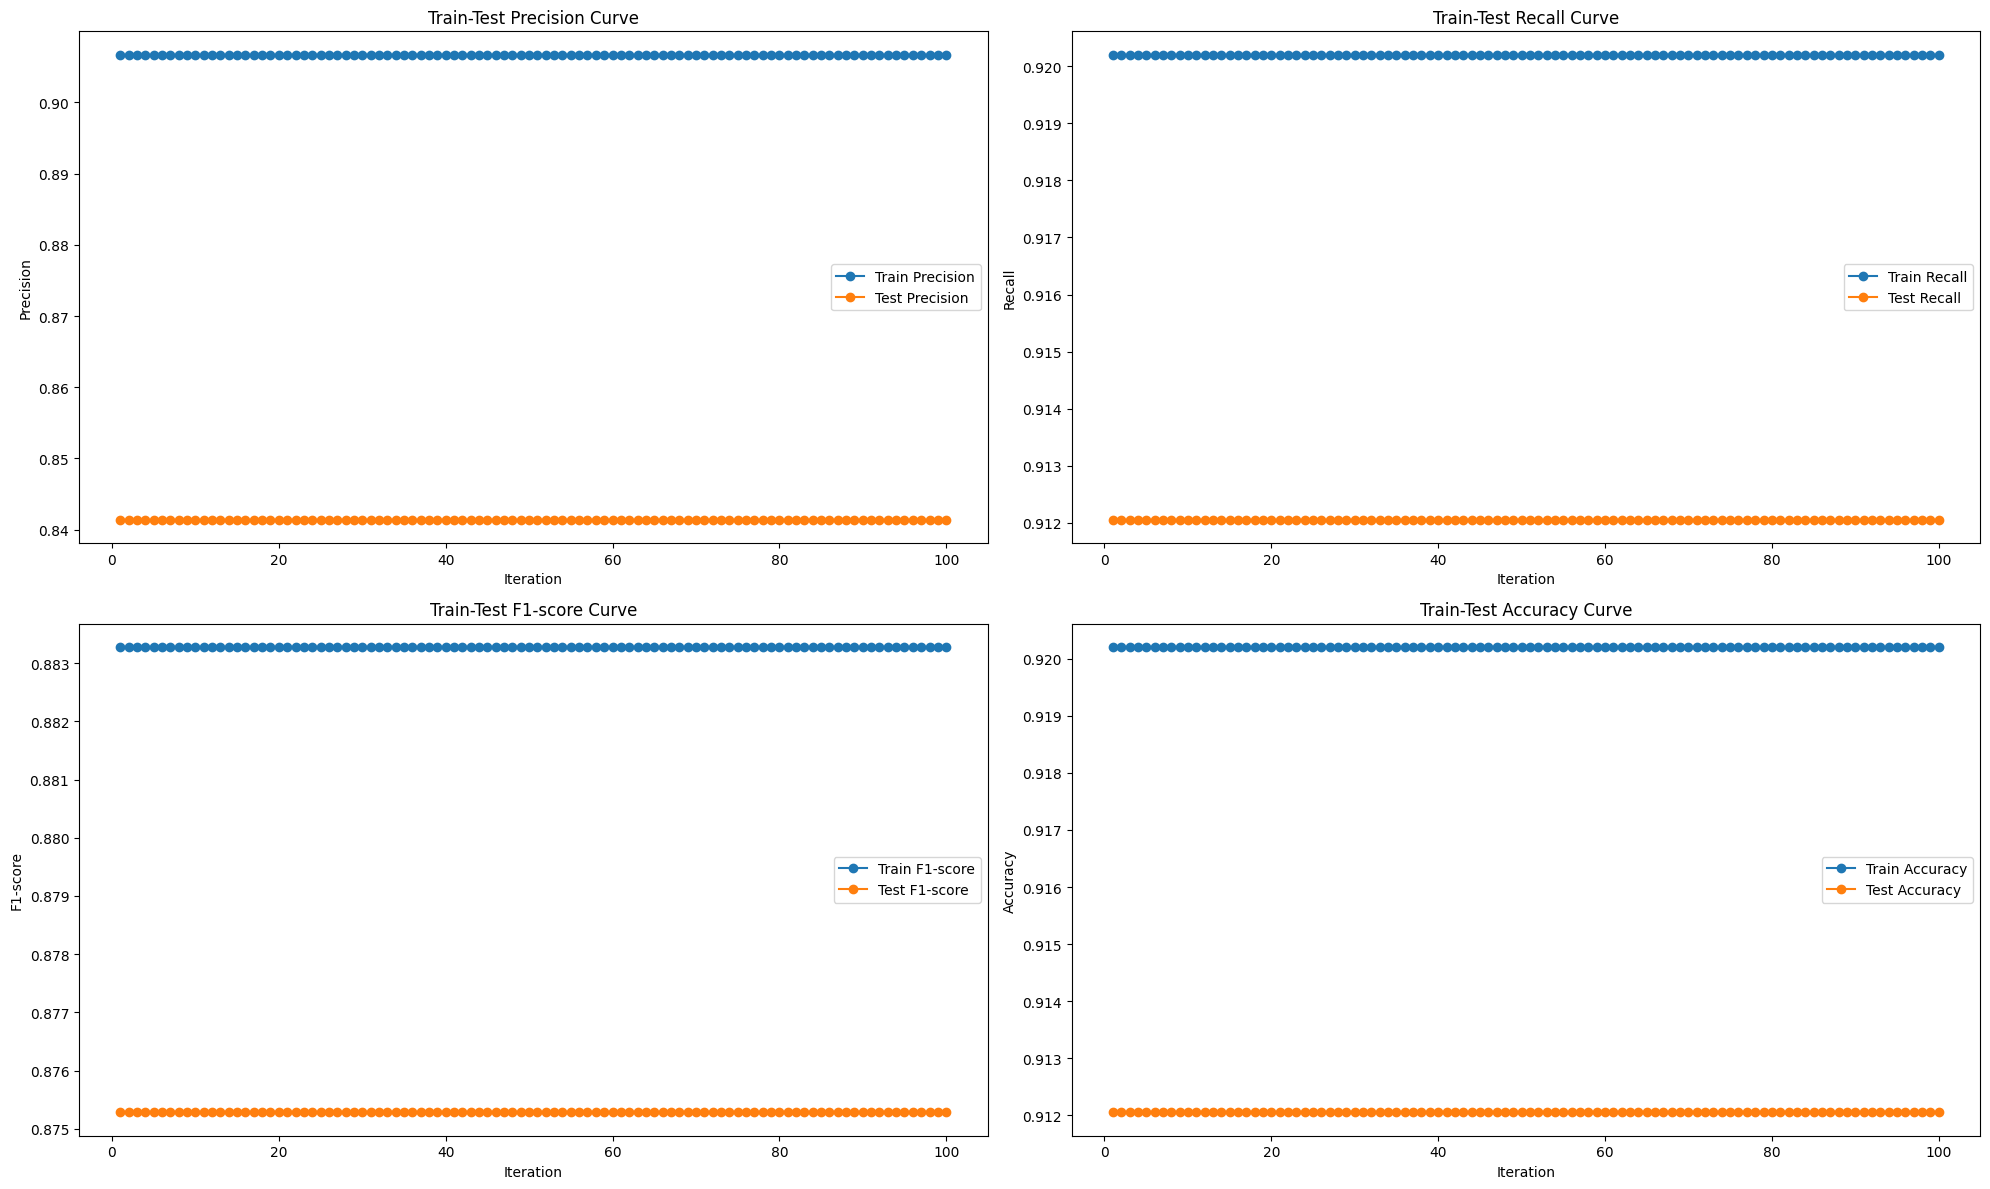

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable respectively

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):

    # Step 2: Model training
    knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed
    knn_classifier.fit(X_train, y_train)

    # Step 3: Model evaluation on train and test sets
    y_train_pred = knn_classifier.predict(X_train)
    y_test_pred = knn_classifier.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
    test_precision.append(precision_score(y_test, y_test_pred, average='weighted', zero_division=0))

    train_recall.append(recall_score(y_train, y_train_pred, average='weighted'))
    test_recall.append(recall_score(y_test, y_test_pred, average='weighted'))

    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 12))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the model
logreg_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

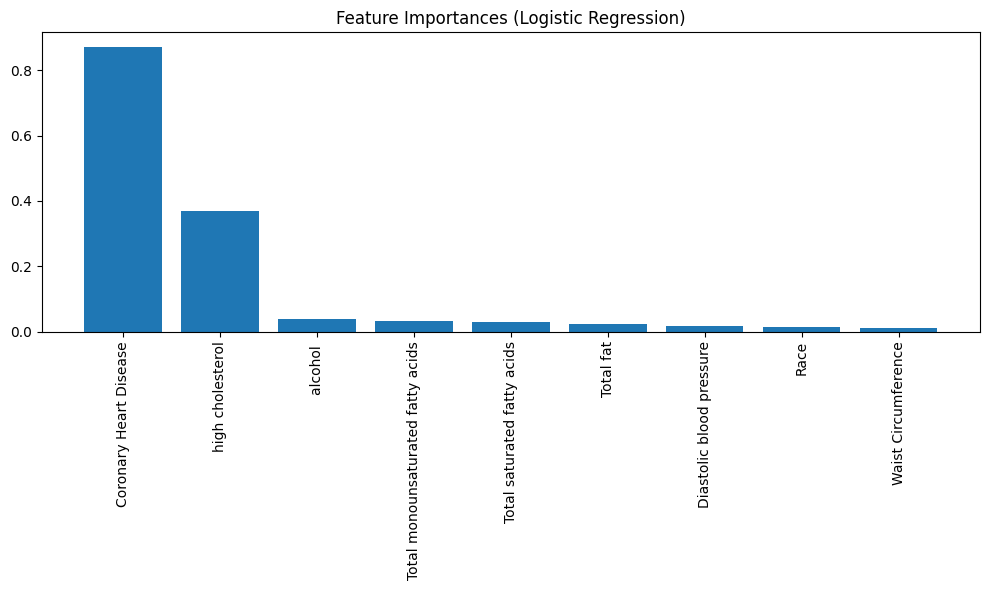

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming logreg_classifier is already trained and X_train is defined

# Get coefficients and feature names
coefficients = logreg_classifier.coef_[0]
feature_names = X_train.columns

# Get absolute coefficients for feature importance
importances = np.abs(coefficients)

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Logistic Regression)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.9218241  0.92073833 0.92073833 0.92173913 0.92173913]
Mean Cross-Validation Score: 0.9213558041825992


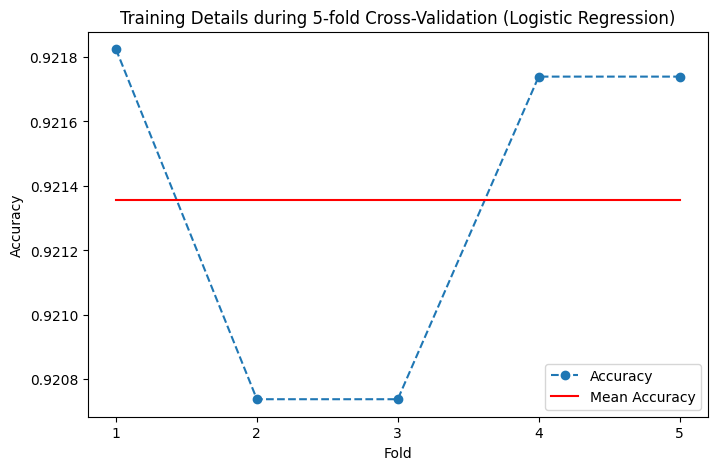

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable respectively

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logreg_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(logreg_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation (Logistic Regression)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

Accuracy: 0.9174809989142236
Precision: 0.8417713833686417
Recall: 0.9174809989142236
F1-score: 0.8779971054162162
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       845
           1       0.00      0.00      0.00        76

    accuracy                           0.92       921
   macro avg       0.46      0.50      0.48       921
weighted avg       0.84      0.92      0.88       921



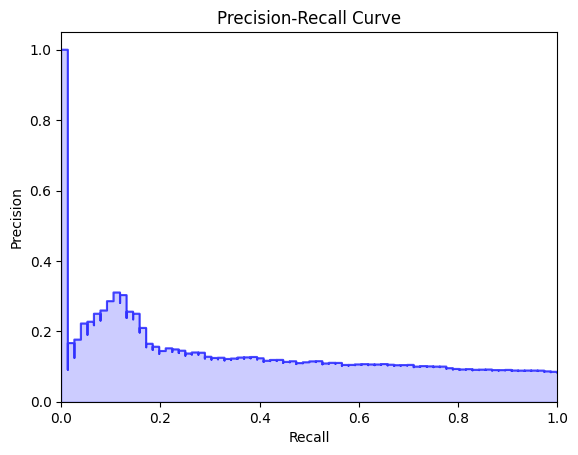

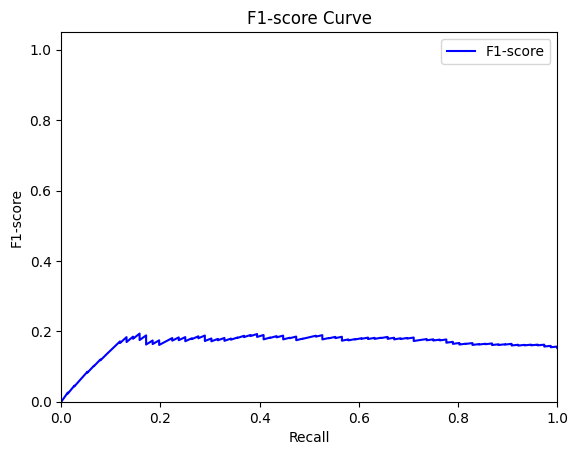

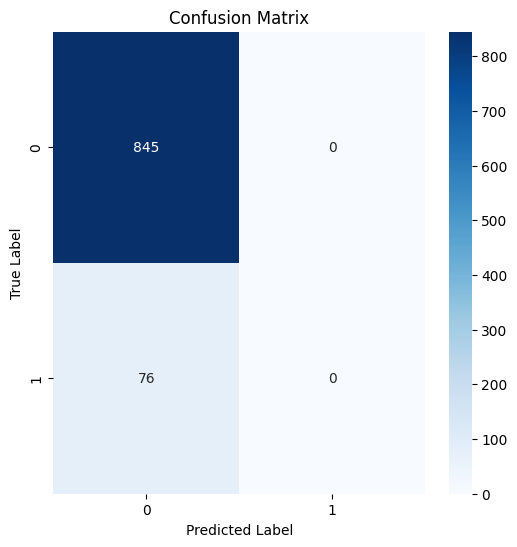

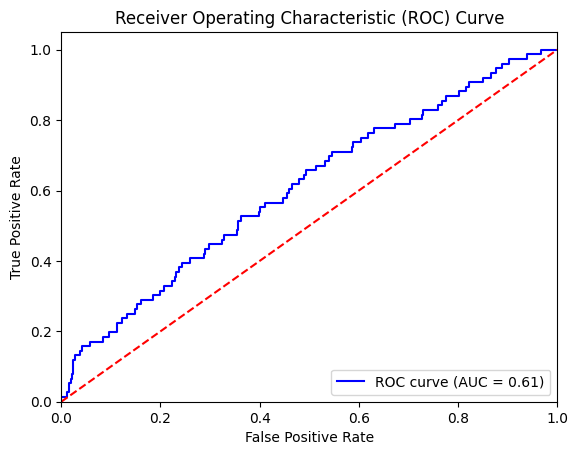

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, y_train, X_test, and y_test are already defined

# Initialize the logistic regression classifier
logreg_classifier = LogisticRegression()

# Fit the classifier with the training data
logreg_classifier.fit(X_train, y_train)

# Predictions
y_pred = logreg_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score with 'weighted' average
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Precision-Recall curve
y_pred_probs = logreg_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_pred_probs = logreg_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


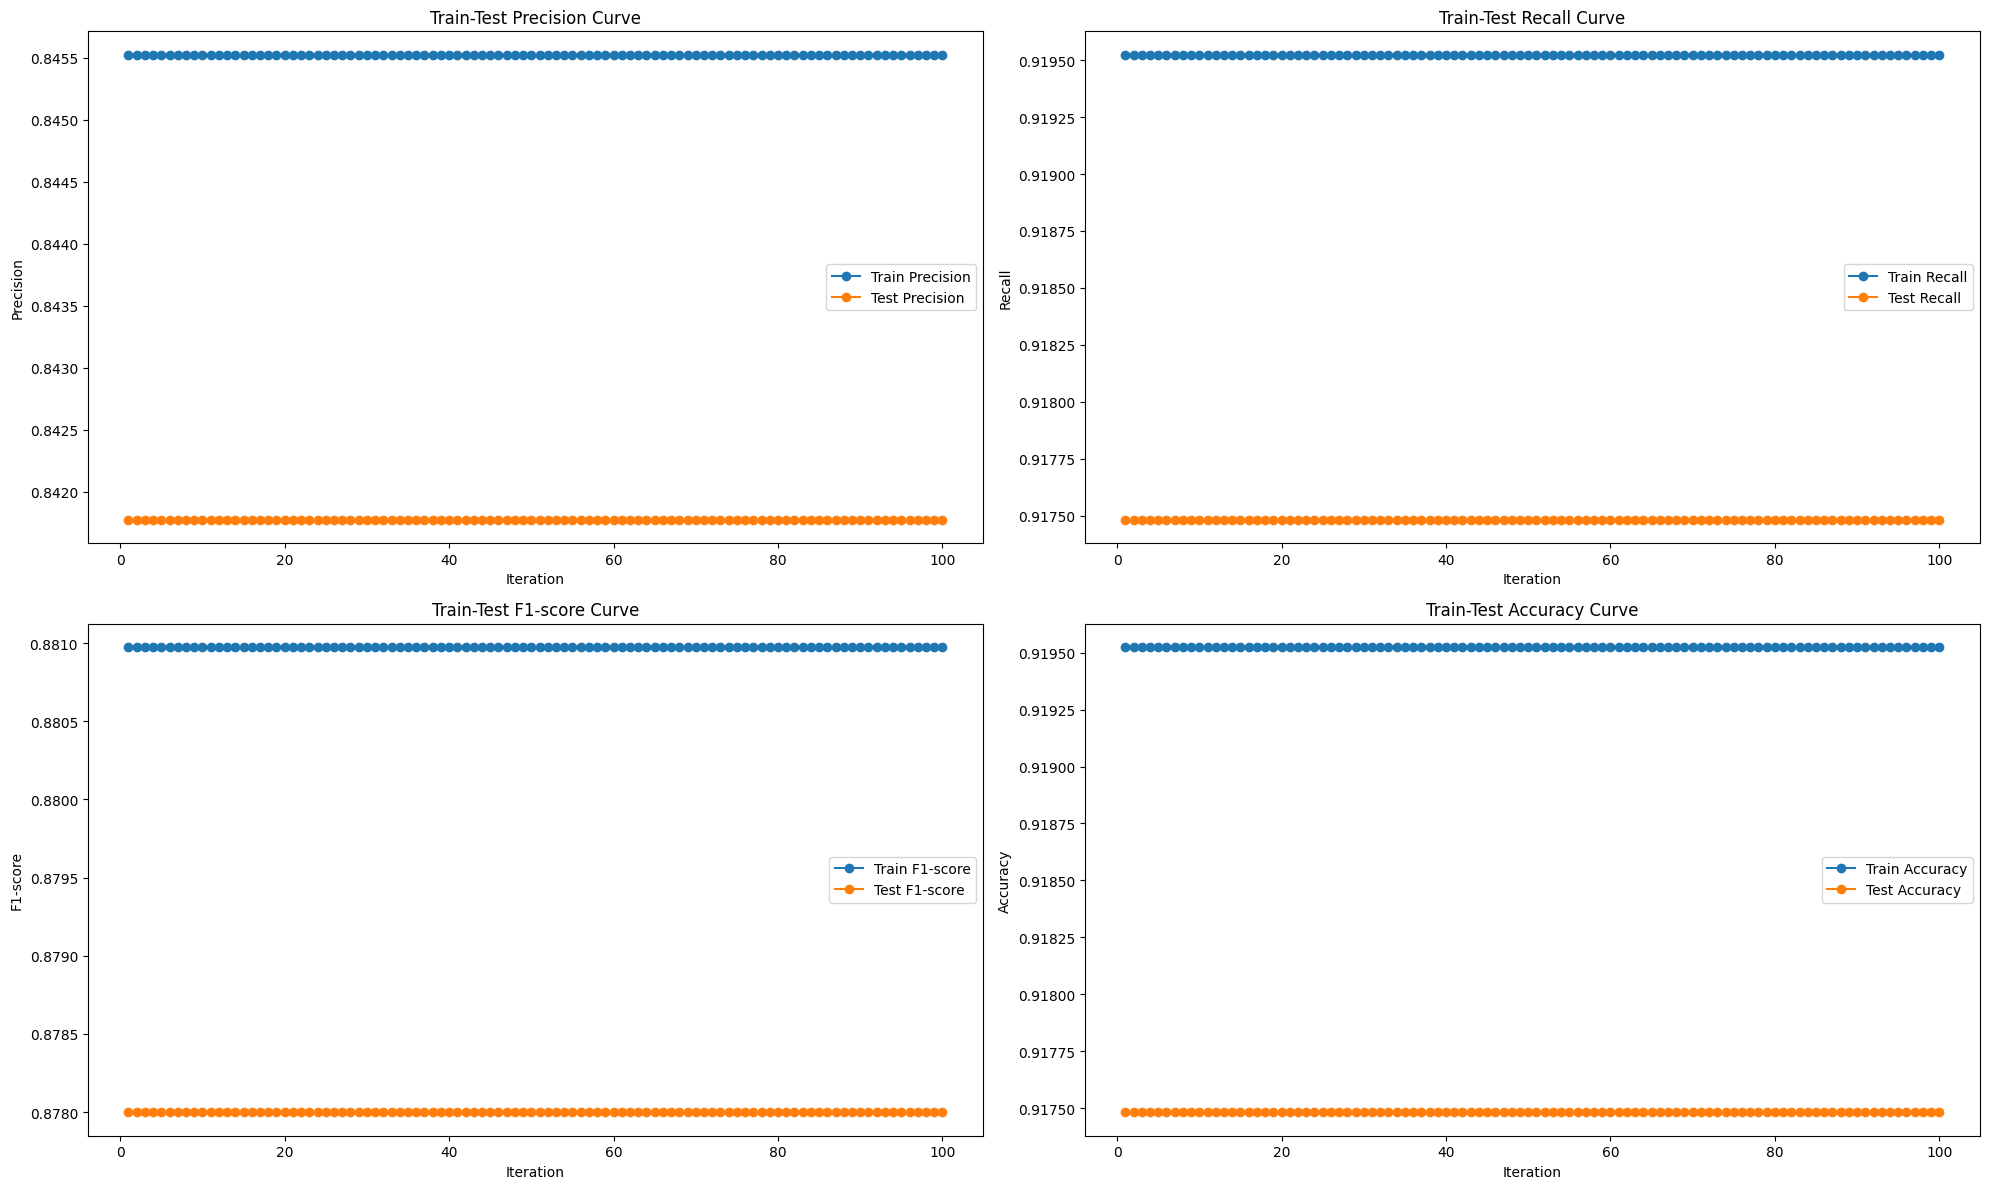

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are your features and target variable respectively

# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Step 1: Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Step 2: Model training
    logreg_classifier = LogisticRegression(max_iter=1000, random_state=i)  # Set a different random state for each iteration
    logreg_classifier.fit(X_train, y_train)

    # Step 3: Model evaluation on train and test sets
    y_train_pred = logreg_classifier.predict(X_train)
    y_test_pred = logreg_classifier.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred, average='weighted', zero_division=0))
    test_precision.append(precision_score(y_test, y_test_pred, average='weighted', zero_division=0))

    train_recall.append(recall_score(y_train, y_train_pred, average='weighted'))
    test_recall.append(recall_score(y_test, y_test_pred, average='weighted'))

    train_f1.append(f1_score(y_train, y_train_pred, average='weighted'))
    test_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 4: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 12))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best ROC AUC Score for Random Forest: 0.5637733223794659


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


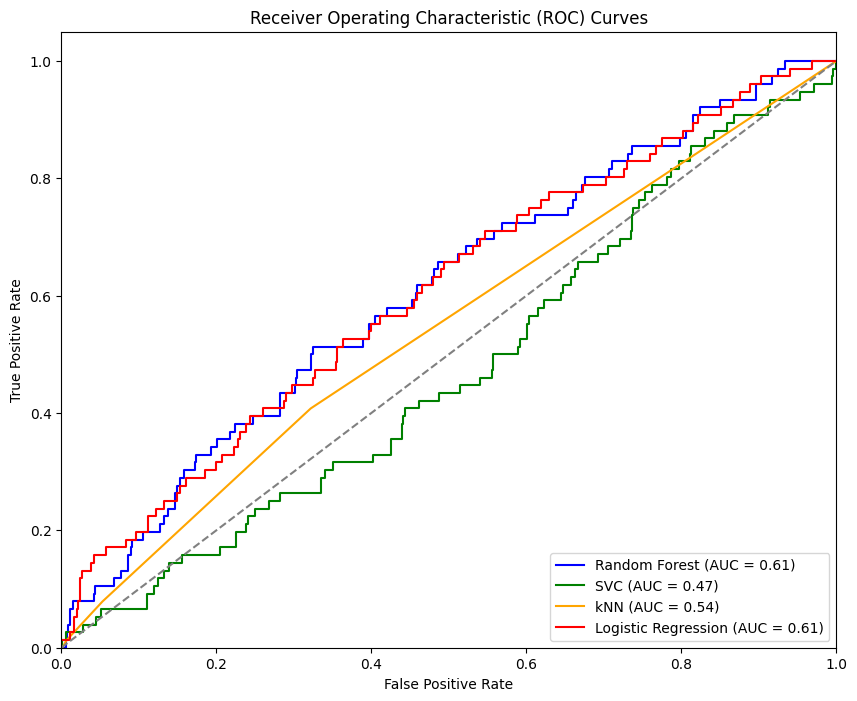

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, and y_test are already defined

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object for Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters for Random Forest:", best_params)
print("Best ROC AUC Score for Random Forest:", best_score)

# Use the best model found by GridSearchCV
best_rf_classifier = grid_search.best_estimator_

# Standardize the features for SVC and kNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVC
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train_scaled, y_train)

# kNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Logistic Regression
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
rf_probs = best_rf_classifier.predict_proba(X_test)[:, 1]
svc_probs = svc_classifier.predict_proba(X_test_scaled)[:, 1]
knn_probs = knn_classifier.predict_proba(X_test_scaled)[:, 1]
logreg_probs = logreg_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC values
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svc_auc = auc(svc_fpr, svc_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(svc_fpr, svc_tpr, color='green', label='SVC (AUC = %0.2f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, color='orange', label='kNN (AUC = %0.2f)' % knn_auc)
plt.plot(logreg_fpr, logreg_tpr, color='red', label='Logistic Regression (AUC = %0.2f)' % logreg_auc)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

# Save the plot with 600 DPI
plt.savefig('roc_curves.png', dpi=600)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters for Random Forest: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best ROC AUC Score for Random Forest: 0.5652462006735536


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


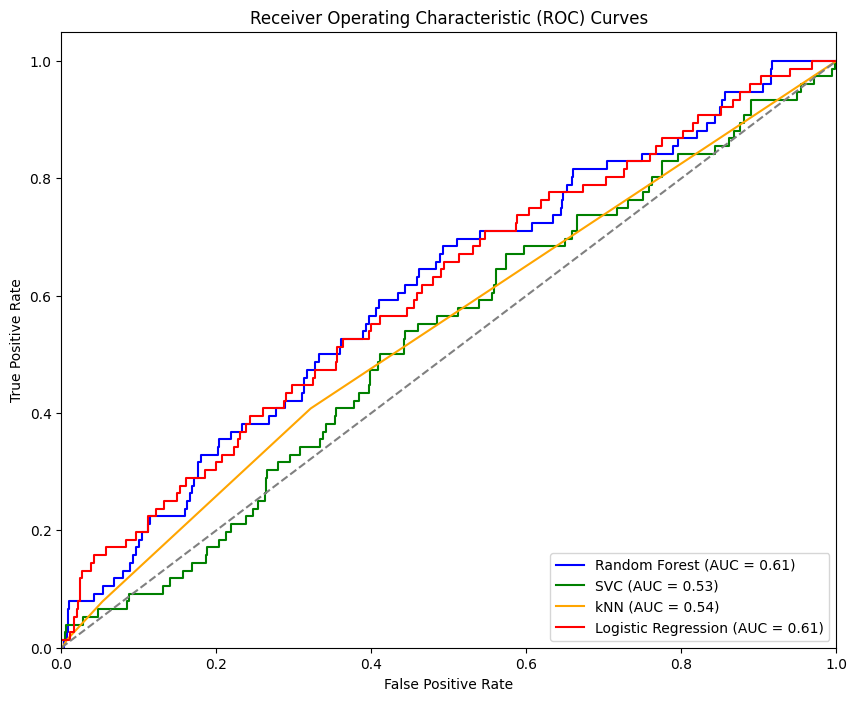

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, and y_test are already defined

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the GridSearchCV object for Random Forest
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters for Random Forest:", best_params)
print("Best ROC AUC Score for Random Forest:", best_score)

# Use the best model found by GridSearchCV
best_rf_classifier = grid_search.best_estimator_

# Standardize the features for SVC and kNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVC
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train_scaled, y_train)

# kNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Logistic Regression
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Get the predicted probabilities for the positive class
rf_probs = best_rf_classifier.predict_proba(X_test)[:, 1]
svc_probs = svc_classifier.predict_proba(X_test_scaled)[:, 1]
knn_probs = knn_classifier.predict_proba(X_test_scaled)[:, 1]
logreg_probs = logreg_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curves and AUC values
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

rf_auc = auc(rf_fpr, rf_tpr)
svc_auc = auc(svc_fpr, svc_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
logreg_auc = auc(logreg_fpr, logreg_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(svc_fpr, svc_tpr, color='green', label='SVC (AUC = %0.2f)' % svc_auc)
plt.plot(knn_fpr, knn_tpr, color='orange', label='kNN (AUC = %0.2f)' % knn_auc)
plt.plot(logreg_fpr, logreg_tpr, color='red', label='Logistic Regression (AUC = %0.2f)' % logreg_auc)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

# Save the plot with 600 DPI
plt.savefig('roc_curves.png', dpi=600)

# Show the plot
plt.show()
